<a href="https://colab.research.google.com/github/Petrichoeur/TER/blob/master/utilitaires/Traitement_donnees_antoine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Traitement des données Antoine

---


Antoine est né le 10 avril 2006. Son père est consultant en informatique bancaire et sa mère est responsable d’une agence de voyage. Il est le premier enfant de la famille et a maintenant un petit frère de deux ans et dix mois de moins que lui. Antoine est un petit garçon gracieux, sociable et prudent qui aime explorer le monde qui l’entoure. 

Christophe Parisse l’a filmé pour la première fois alors qu’il n’était âgé que de 13 jours! Depuis, il se rend dans sa famille environ une heure par mois. Antoine n’est pas un petit garçon naturellement bavard et préfère communiquer par le regard ou des sous-entendus. Par conséquent, il est difficile de qualifier son développement langagier de bon ou moyen car il ne produit pas énormément d’énoncés mais lorsqu’il s’exprime, il parle correctement.


# Nettoyage 

## Chargement des données

Récupèrer la liste des noms de fichier pour Antoine :
* Ces fichiers sont placés dans un repertoire 'data/antoine_texte'
* Ils sont issuent d'une extraction sur le site colaje au format chat
* Nous les avons transformés en format .txt afin de pouvoir les traiter avec python

In [0]:
import os 
import pandas as pd 

print(os.getcwd())
os.chdir('C:\\Users\\Lamou\\Desktop\\MIASHS\\TER_a\\data\\antoine_texte')
listing=os.listdir() # On crée une liste de tout les noms des fichiers

C:\Users\lamou\Desktop\MIASHS\TER_a


In [0]:
#listing

Nous avons 61 fichiers pour Antoine, chacun de ses fichiers corresepondent aux retrancriptions d'un enregistrement vidéo.


## Lecture des données

* Définir le nom des colonnes selon le fichier final attendu
* Lire chaque fichier de la liste 
* Ajouter les colonnes nom de l'enfant et son age
* La colonne age identifie de manière unique l'enregistrement

In [0]:
os.chdir('C:\\Users\\Lamou\\Desktop\\MIASHS\\TER_a\\data\\antoine_texte')

d = {} # Le dictionnaire contenant les noms des fichiers
nom_col = ['type', 'seconde_debut', 'seconde_fin', 'contenu']
rows = 0 #Compteur de ligne pour vérifier la perte de données

for file in listing: 
    d[file]=pd.read_csv(file, 
                        sep = '\t', 
                        names = nom_col, 
                        header = None)  

    # On ajoute le nom de l'enfant
    nom_pos1 = 0
    nom_pos2 = file.find('-')
    nom = file[nom_pos1:nom_pos2]
    d[file]['enfant'] = nom
    
    #On ajoute l'age de l'enfant
    age_pos1 = file.find('_')-1
    age_pos2 = file.find('.')
    age = file[age_pos1:age_pos2]
    d[file]['age'] = age
    
    rows += len(d[file])
    
    
# DataFrame contenant toutes les lignes de l'enfant
data = pd.concat([d[file] for file in listing], 
                 sort=False,
                 ignore_index=True) 

In [0]:
data.shape

(146442, 6)

## Vérification de la perte de données

On vérifie qu'il y a autant de ligne lu (variable rows) que de ligne écritent (len(data))

In [0]:
print(rows == len(data))

True


## Ordre des colonnes

In [0]:
data=data[['enfant', 'age','type', 'seconde_debut', 'seconde_fin', 'contenu']]
data.head()

,enfant,age,type,seconde_debut,seconde_fin,contenu
0,ANTOINE,0_00_13,+div+,0.0,212.0,div |
1,ANTOINE,0_00_13,+div+,0.0,67.0,div |
2,ANTOINE,0_00_13,CHI,0.0,7.0,0 [= pleurs] .
3,ANTOINE,0_00_13,CHI,7.0,11.0,0 [= pleurs] .
4,ANTOINE,0_00_13,FAT,11.0,19.0,regarde !


## Création du fichier final format csv

In [0]:
# Création du fichier enfant
os.chdir('C:\\Users\\Lamou\\Desktop\\MIASHS\\TER_a\\data')
data.to_csv('data_antoine_final.csv',
           encoding = 'utf-8',
           sep = '\t',
           header = True)

On peut maintenant utiliser le fichier 'data_antoine_finale.csv' pour l'exploration de données.

## Lecture fichier final

In [0]:
os.chdir('C:\\Users\\Lamou\\Desktop\\MIASHS\\TER_a\\data')
data_antoine = pd.read_csv('data_antoine_final.csv',
                           sep = '\t',
                           encoding = 'utf-8',
                           index_col=False)

# On supprime la colonne qui duplique les index
data_antoine = data_antoine.drop(columns = 'Unnamed: 0')

In [0]:
data_antoine.loc[data_antoine['age'] == '0_00_13']

,enfant,age,type,seconde_debut,seconde_fin,contenu
0,ANTOINE,0_00_13,+div+,0.0,212.0,div |
1,ANTOINE,0_00_13,+div+,0.0,67.0,div |
2,ANTOINE,0_00_13,CHI,0.0,7.0,0 [= pleurs] .
3,ANTOINE,0_00_13,CHI,7.0,11.0,0 [= pleurs] .
4,ANTOINE,0_00_13,FAT,11.0,19.0,regarde !
5,ANTOINE,0_00_13,FAT,19.0,21.0,ça c'est un appareil+photo .
6,ANTOINE,0_00_13,act,NaN,NaN,FAT caresse la joue de CHI qui se calme .
7,ANTOINE,0_00_13,FAT,21.0,26.0,ça sert à faire des images .
8,ANTOINE,0_00_13,FAT,26.0,31.0,moi aussi j' en ai un mais il n' est pas numér...
9,ANTOINE,0_00_13,act,NaN,NaN,FAT continue à caresser la joue de CHI qui est...


# Exploration des données

---

Qu'elles sont les différents type de ligne ?

In [0]:
print(len(data_antoine['type'].unique()))

51


Il existe 51 types de ligne dans les fichiers Antoine :

In [0]:
print(data_antoine['type'].unique())

['+div+' 'CHI' 'FAT' 'act' 'OBS' 'com' '-div-' 'MOT' 'ANN' 'UNK' 'GRM'
 'pho' 'sit' 'int' 'xpnt' 'add' 'AUN' 'ADU' 'xpol' 'VIS' 'ximi' 'exp'
 'xpho' 'GDM' 'UNI' 'BOY' 'GIR' 'gls' 'gpx' 'fac' 'xdia' 'tim' 'xnpt'
 'CPT' 'JEN' 'WOM' 'mor' 'GDF' 'lia' 'COL' 'VOI' 'CHA' 'COM' 'COU' 'xrep'
 'NAN' 'UNC' 'CAM' 'BRO' 'BAB' 'xpt']


## Les phonèmes

Les lignes de type 'pho' correspondent à la traduction phonétique lorsque Antoine s'exprime :
* Nous avons à disposition 16116 traductions pour Antoine 
* On distingue les premiers mots d'Antoine à l'age d'un an et 14 jours
* Les traductions s'arrêtent à l'age de 6 ans 3 mois et 8 jours

In [0]:
pho_antoine = data_antoine[data_antoine['type'] == 'pho']
#pho_antoine

In [0]:
xpho_antoine = data_antoine[data_antoine['type'] == 'xpho']
#xpho_antoine

### Valeurs NaN

Il existe 4 valeurs NaN dans la colonne contenu, nous allons les supprimer :

In [0]:
pho_antoine.loc[pho_antoine['contenu'].isna()]

,enfant,age,type,seconde_debut,seconde_fin,contenu
2152,ANTOINE,1_00_24,pho,NaN,NaN,NaN
2372,ANTOINE,1_00_24,pho,NaN,NaN,NaN
23672,ANTOINE,1_07_15,pho,NaN,NaN,NaN
29960,ANTOINE,1_08_05,pho,NaN,NaN,NaN


In [0]:
#Supprime les 4 lignes
pho_antoine = pho_antoine.dropna(subset=['type', 'contenu'])

Nous allons chercher à visualiser la quantité phonétique de données à disposition

## Visualisation des données phonétiques

### Ajout des colonnes 'année', 'mois' et 'jour'

On considère que la colonne age a pout format : x_xx_xx (année_mois_jour) ainsi :
* ``pho_antoine['age'][0:1]`` nous donne le nombre d'année
* ``pho_antoine['age'][2:4]`` nous donne le nombre de mois
* ``pho_antoine['age'][5:7]`` nous donne le nombre de jours

In [0]:
# Ajout du nombre d'année
année_pho_antoine = pho_antoine.apply(lambda row: row['age'][0:1], axis=1)
pho_antoine['année'] = année_pho_antoine

# Ajout du nombre de mois
mois_pho_antoine = pho_antoine.apply(lambda row: row['age'][2:4], axis=1)
pho_antoine['mois'] = mois_pho_antoine

# Ajout du nombre de jour
jour_pho_antoine = pho_antoine.apply(lambda row: row['age'][5:7], axis=1)
pho_antoine['jour'] = jour_pho_antoine

In [0]:
#pho_antoine

## Quantité de données

Combien avons-nous de ligne pour chaque année ? mois ? jour ?

### Quantité de données par année

In [0]:
nb_phrase_annee = pho_antoine[{'année','contenu'}].groupby('année').count()
nb_phrase_annee.rename(columns={'contenu': 'nb_phrase'})

,nb_phrase
année,
1,3574
2,7291
3,2456
4,2215
5,575
6,1


In [0]:
nb_phrase_annee.plot(kind='bar', 
                       subplots=True, 
                       figsize=(20,10),
                       title = 'Nombre de données phonétiques par année : Antoine',
                       fontsize = 15,
                       use_index = True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001C60F2305C0>],
      dtype=object)

On voit qu'il y a des quantités de données phonétiques différentes pour chaques années :
* Il y a deux fois plus de données la deuxième année que la première (surement dû à une prise de la parole plus importante chez Antoine)
* Il y a moins de données les troisième et quatrième années (surement dû à des prises de parole plus complexes chez Antoine)
* Il y a moins beaucoup moins de données la cinquième année
* Peut-on considérer la sixième année comme n'ayant aucune donnée ?

### Quantité de données par mois

Regardons plus en détail la quantité de données phonétiques par mois :

In [0]:
nb_phrase_mois = pho_antoine[{'année','mois','contenu'}].groupby(['année','mois']).count()
nb_phrase_mois = nb_phrase_mois.rename(columns={'contenu': 'nb_phrase'})
nb_phrase_mois.unstack(level=1)

nb_phrase                                                           \
mois         00     01      02     03     04     05     06     07     08   
année                                                                      
1         186.0  187.0   170.0  187.0  276.0  256.0  208.0  185.0  403.0   
2         829.0  837.0  1195.0  814.0  706.0  386.0  430.0  476.0  415.0   
3         589.0    NaN   360.0    NaN    NaN  536.0    NaN  425.0    NaN   
4         428.0    NaN   447.0    NaN    NaN  721.0    NaN    NaN  615.0   
5           NaN    NaN   566.0    NaN    5.0    NaN    NaN    4.0    NaN   
6           NaN    NaN     NaN    1.0    NaN    NaN    NaN    NaN    NaN   

                            
mois      09     10     11  
année                       
1      585.0  305.0  626.0  
2      631.0    NaN  572.0  
3      546.0    NaN    NaN  
4        NaN    4.0    NaN  
5        NaN    NaN    NaN  
6        NaN    NaN    NaN

Nous avons moins de 5 phrases pour les ages : 
* 4_00_xx
* 5_04_xx
* 5_07_xx
* 6_03_xx

On voit aussi qu'il y a des mois sans données, cela vérifie qu'il y ait moins de données pour les années 3, 4 et 5 

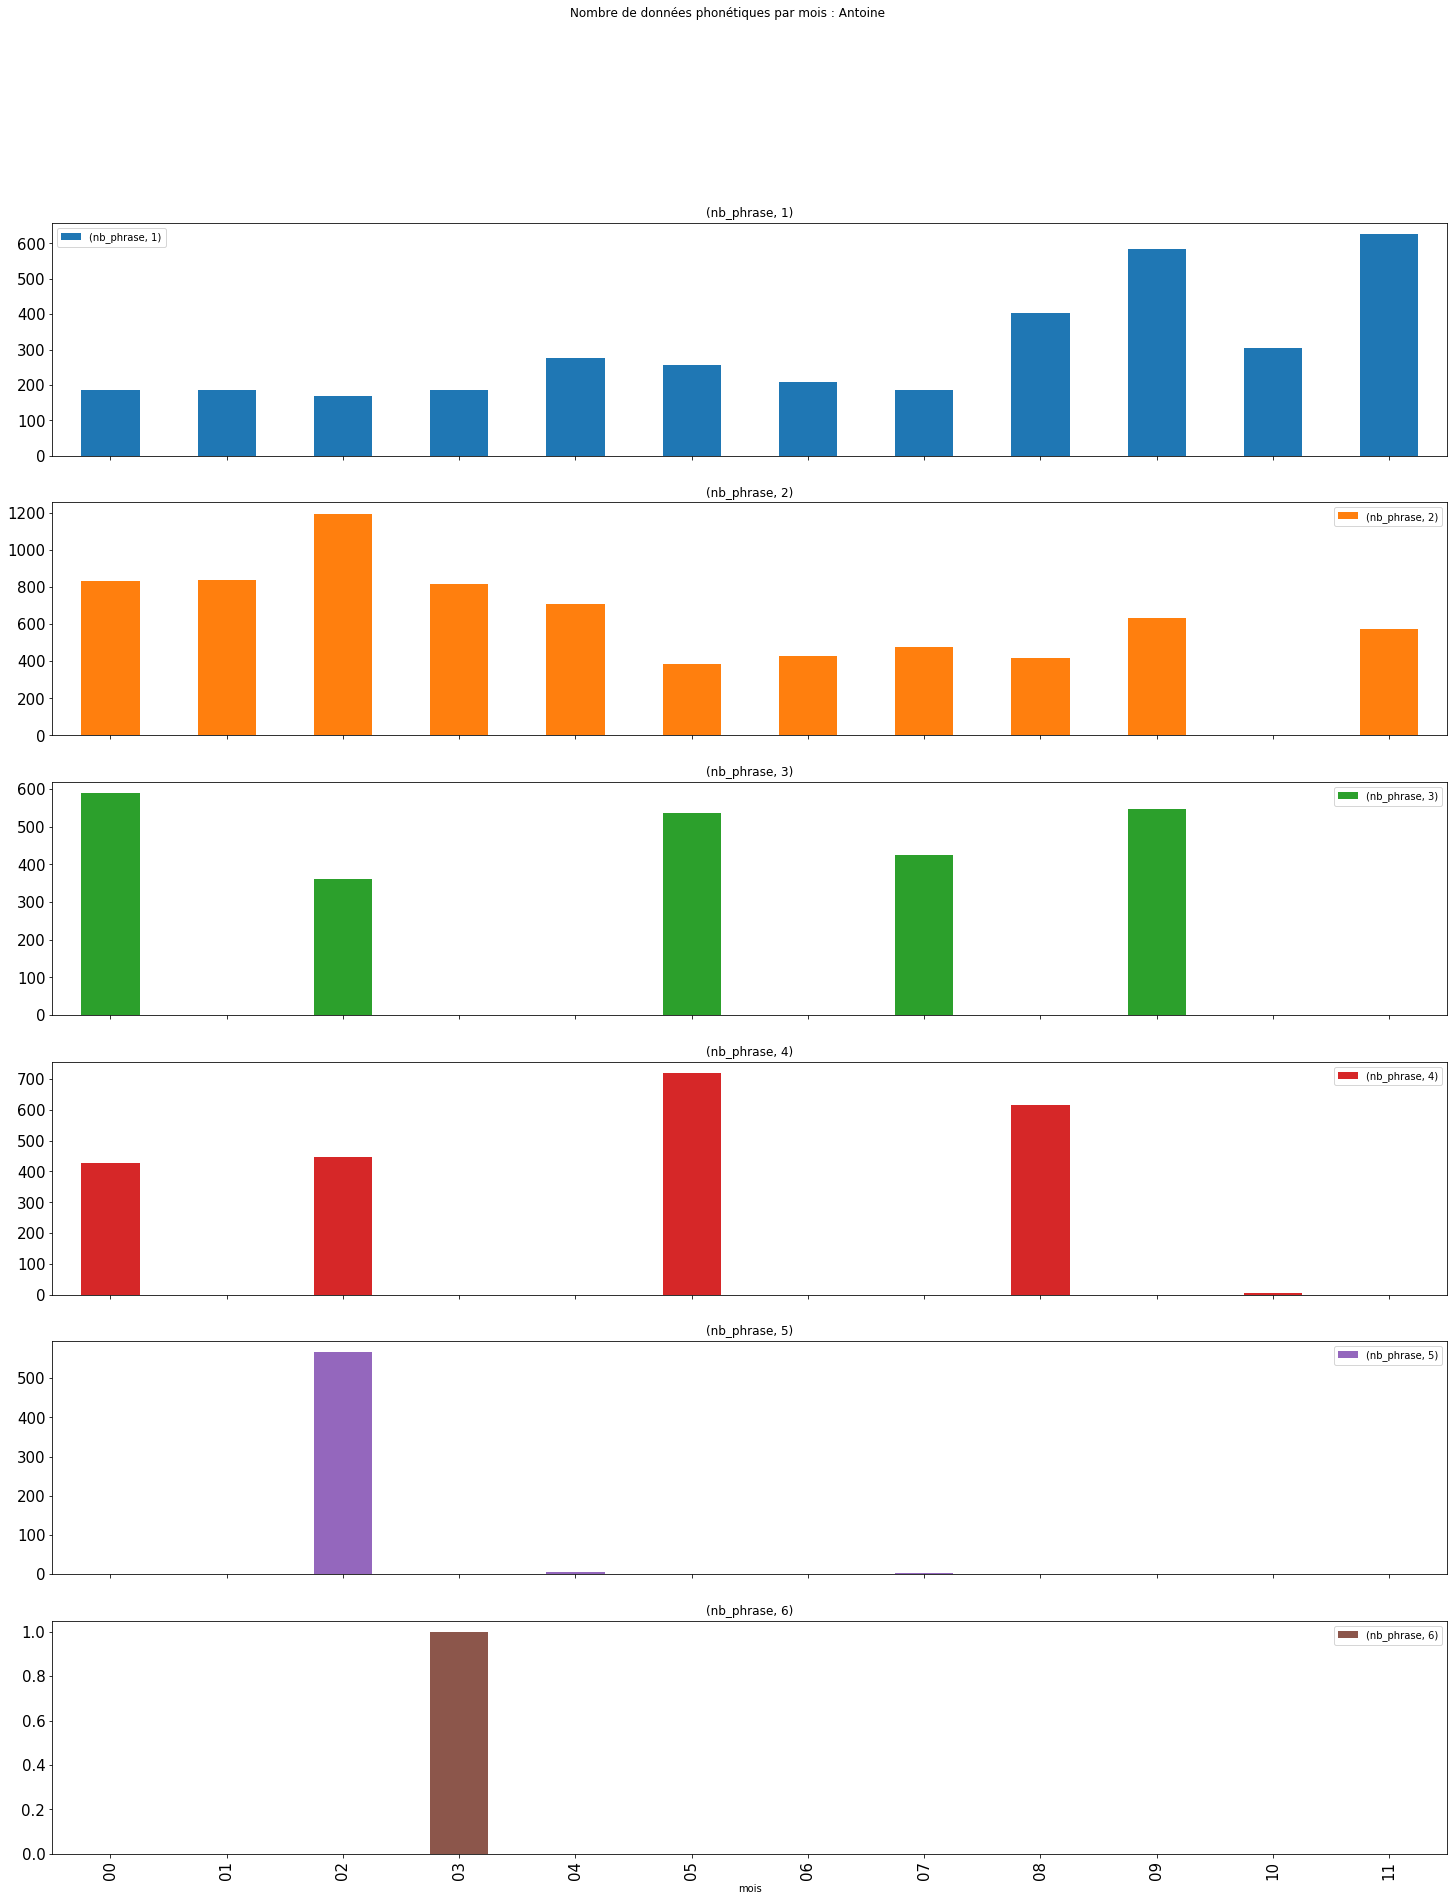

In [0]:
plt = nb_phrase_mois.unstack(level=0).plot(kind='bar', 
                                     subplots=True, 
                                     figsize=(25, 30),
                                     title = 'Nombre de données phonétiques par mois : Antoine',
                                     fontsize = 15,
                                     use_index = True)

En effet on voit qu'il y a moins d'enregistrements effectués sur Antoine les troisième et quatrième années. De même la cinquième année ne contient qu'un mois avec une quantité de données significative. On voit encore ici que la sixième contient une seule ligne de traduction phonétique. 

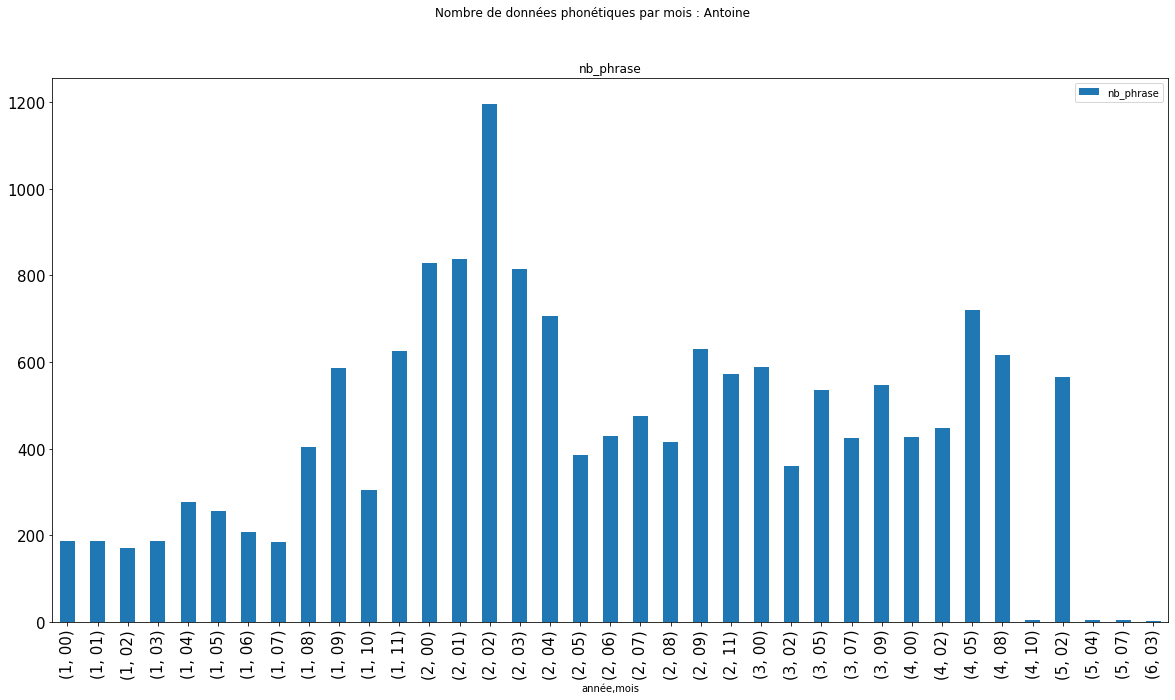

In [0]:
plt = nb_phrase_mois.plot(kind='bar',
                    subplots=True, 
                    figsize=(20, 10),
                    title = 'Nombre de données phonétiques par mois : Antoine',
                    fontsize = 15,
                    use_index = True)

Cette distribution n'est pas homogène, de plus elle n'est pas distribué de manière équitable dans le temps. En effet nous avons ici 23 lignes de données pour les années 1 et 2

### Quantité de données par jour

Regardons maintenant la quantité de données par jours :

In [0]:
nb_phrase_jour = pho_antoine[{'année','mois', 'jour', 'contenu'}].groupby(['année','mois', 'jour']).count()
nb_phrase_jour = nb_phrase_jour.rename(columns={'contenu': 'nb_phrase'})
#nb_phrase_jour

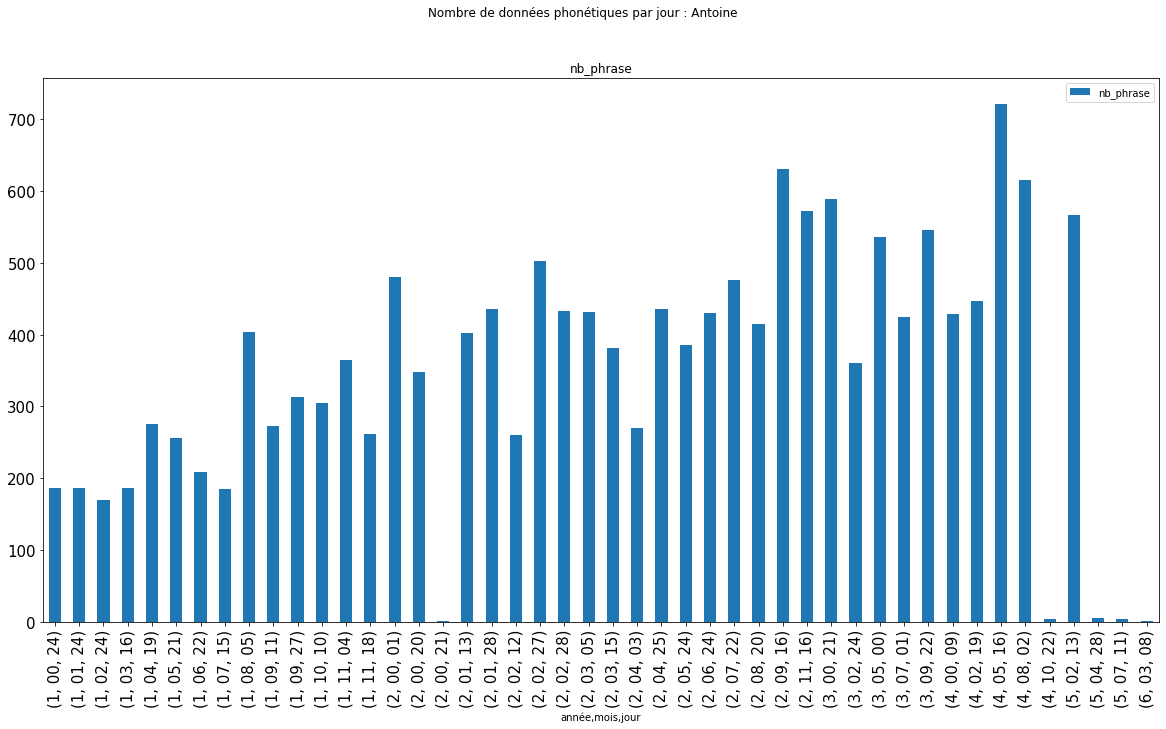

In [0]:
plt = nb_phrase_jour.plot(kind='bar',
                    subplots=True,
                    figsize=(20, 10),
                    title = 'Nombre de données phonétiques par jour : Antoine',
                    fontsize = 15,
                    use_index = True)

De cette manière on a une distribution plus homogène de la quantité de données phonétique. En effet nous avons découpé les données de tel sorte à avoir la quantité de données pour chaque enregistrement d'Antoine. Mais elle n'est pas distribué de manière équitable dans le temps. On peut mesurer la croissance du nombre de prise de parole (on pourrait croiser cette donnée avec la durée de l'enregistrement pour une meilleure mesure). <br>
Pour cela nous devons ignorer les quantités pour les ages (car ces quantités ne sont pas représentatives et cela fausserais notre mesure):
* 2_00_21
* 4_10_22
* 5_04_11
* 5_07_11
* 6_03_08

On a maintenant une meilleure vision du nombre de la quantité de données phonétiques à disposition et de leur répartition dans le temps pour Antoine.

## Nombre de mot
Nous allons chercher à explorer le nombre de mot au sens phonétique par phrase. <br>
Pour cela on peut compter le nombre d'espace dans la chaîne de caractère :

In [0]:
# Exemple 
pho = pho_antoine.at[141596, 'contenu']
print('Nombre de mot dans "' + pho + ' : '+ str(pho.count(' ')+1))

Nombre de mot dans "epɥi ʁəgaʁd la kɑ̃ t a f t ɛ fe tudududu sa fɛ kɔm sa : 15


Pour chaque ligne on calcul le nombre de mot phonétique :

In [0]:
nb_mot_pho = pho_antoine.apply(lambda row: row['contenu'].count(' ')+1, axis=1)
pho_antoine['nombre_mot_phonétique'] = nb_mot_pho #On ajoute une colonne contenant le nombre de mot

Par exemple on peut avoir la phrase d'Antoine avec le plus grand nombre de mot :

In [0]:
pho_antoine.loc[pho_antoine['nombre_mot_phonétique'] == pho_antoine['nombre_mot_phonétique'].max()].contenu.values

array(['əm matjø mwa ʒ e fini tu lə skɔtʃ alɔʁ i fo k t ɑ̃ ʁəmɛt dɑ̃ ʁəpʁɑ̃d dy skotʃ paʁskə j ɑ̃na ply si si dəmɛ̃ matɛ̃ ʒ vø akʁoʃe ɑ̃kɔʁ dɛ dɛsɛ̃ ʃe mwa'],
      dtype=object)

Voici la ligne de cette phrase :

In [0]:
pho_antoine.loc[pho_antoine['nombre_mot_phonétique'] == 36 ]

,enfant,age,type,seconde_debut,seconde_fin,contenu,année,mois,jour,nombre_mot_phonétique
130742,ANTOINE,4_08_02,pho,NaN,NaN,əm matjø mwa ʒ e fini tu lə skɔtʃ alɔʁ i fo k ...,4,08,02,36


### Espérance de mot par phrase

In [0]:
mean_nb_mot_pho_antoine_jour = pho_antoine[{'année', 'mois', 'jour', 'nombre_mot_phonétique'}].groupby(['année', 'mois', 'jour']).mean()
mean_nb_mot_pho_antoine_jour = mean_nb_mot_pho_antoine_jour.rename(columns={'nombre_mot_phonétique': 'espérance_nombre_de_mot_phonétique'})
#mean_nb_mot_pho_antoine_jour

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001C6113449B0>],
      dtype=object)

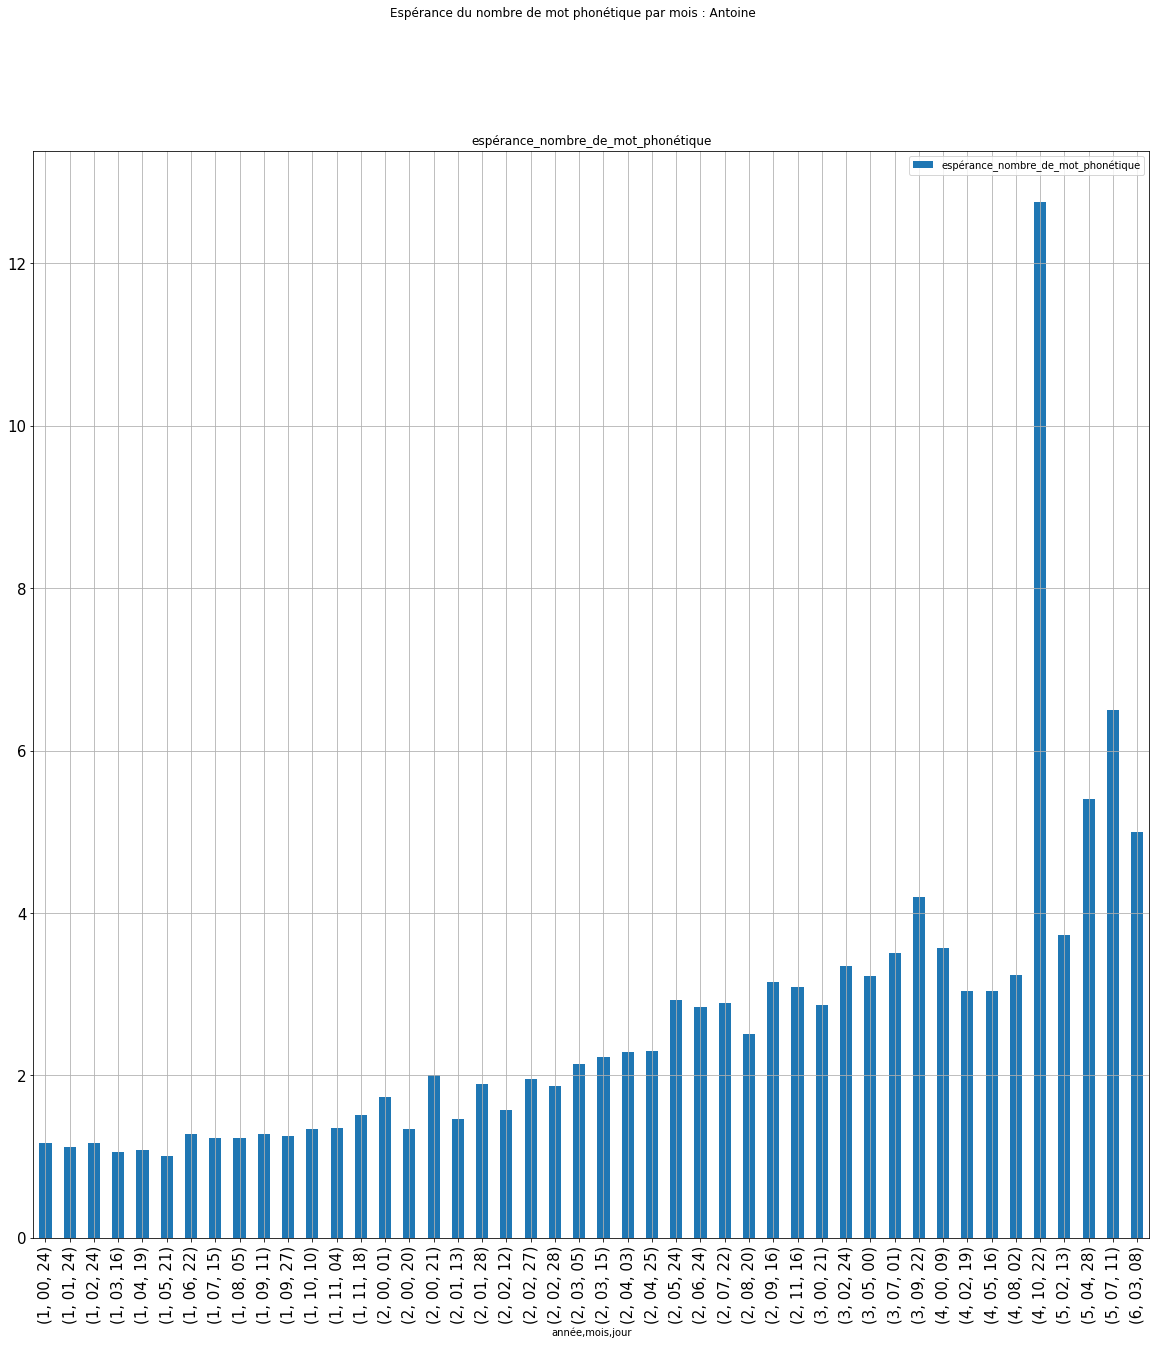

In [0]:
mean_nb_mot_pho_antoine_jour.plot(kind='bar', 
                            subplots=True, 
                            figsize=(20, 20),
                            title = 'Espérance du nombre de mot phonétique par mois : Antoine',
                            fontsize = 15,
                            use_index = True,
                            grid=True)

* On constaste que l'espérance augmente en fonction du temps
* L'esperance pour l'age 4_20_22 est exessivement élevée 

### Variance du nombre de mot par phrase

In [0]:
var_nb_mot_pho_antoine = pho_antoine[{'année','mois','nombre_mot_phonétique'}].groupby(['année','mois']).var()
var_nb_mot_pho_antoine = var_nb_mot_pho_antoine.rename(columns={'nombre_mot_phonétique': 'variance'})
var_nb_mot_pho_antoine.unstack(level=1)

variance                                                                \
mois         00        01         02        03         04        05        06   
année                                                                           
1      0.244115  0.699845   0.292238  0.066414   0.108775  0.003906  0.503693   
2      1.011515  1.422982   1.485587  2.199820   2.290382  3.078211  3.816425   
3      4.519848       NaN   7.103613       NaN        NaN  6.372214       NaN   
4      8.695632       NaN   7.830710       NaN        NaN  8.207031       NaN   
5           NaN       NaN  10.642797       NaN  16.300000       NaN       NaN   
6           NaN       NaN        NaN       NaN        NaN       NaN       NaN   

                                                            
mois          07        08         09         10        11  
année                                                       
1       0.241657  0.627051   0.401370   0.396506  0.864289  
2       4.057050  2.830243   5.329963        NaN  6.086917  
3       7.146704       NaN  12.946846        NaN       NaN  
4            NaN  9.875999        NaN  39.583333       NaN  
5      35.000000       NaN        NaN        NaN       NaN  
6            NaN       NaN        NaN        NaN       NaN

### Plus grande phrase 

In [0]:
max_mot_pho_antoine = pho_antoine[{'année','mois','nombre_mot_phonétique'}].groupby(['année','mois']).max()
max_mot_pho_antoine = max_mot_pho_antoine.rename(columns={'nombre_mot_phonétique': 'longueur_max'})
max_mot_pho_antoine.unstack(level=1)

longueur_max                                                        \
mois            00    01    02    03    04    05    06    07    08    09   
année                                                                      
1              5.0  12.0   5.0   3.0   3.0   2.0   6.0   3.0   8.0   8.0   
2             14.0  10.0  11.0  13.0  14.0   9.0  15.0  13.0  16.0  20.0   
3             12.0   NaN  18.0   NaN   NaN  17.0   NaN  19.0   NaN  27.0   
4             24.0   NaN  21.0   NaN   NaN  24.0   NaN   NaN  36.0   NaN   
5              NaN   NaN  35.0   NaN  10.0   NaN   NaN  15.0   NaN   NaN   
6              NaN   NaN   NaN   5.0   NaN   NaN   NaN   NaN   NaN   NaN   

                   
mois     10    11  
année              
1       6.0  10.0  
2       NaN  28.0  
3       NaN   NaN  
4      20.0   NaN  
5       NaN   NaN  
6       NaN   NaN

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001C61192B710>],
      dtype=object)

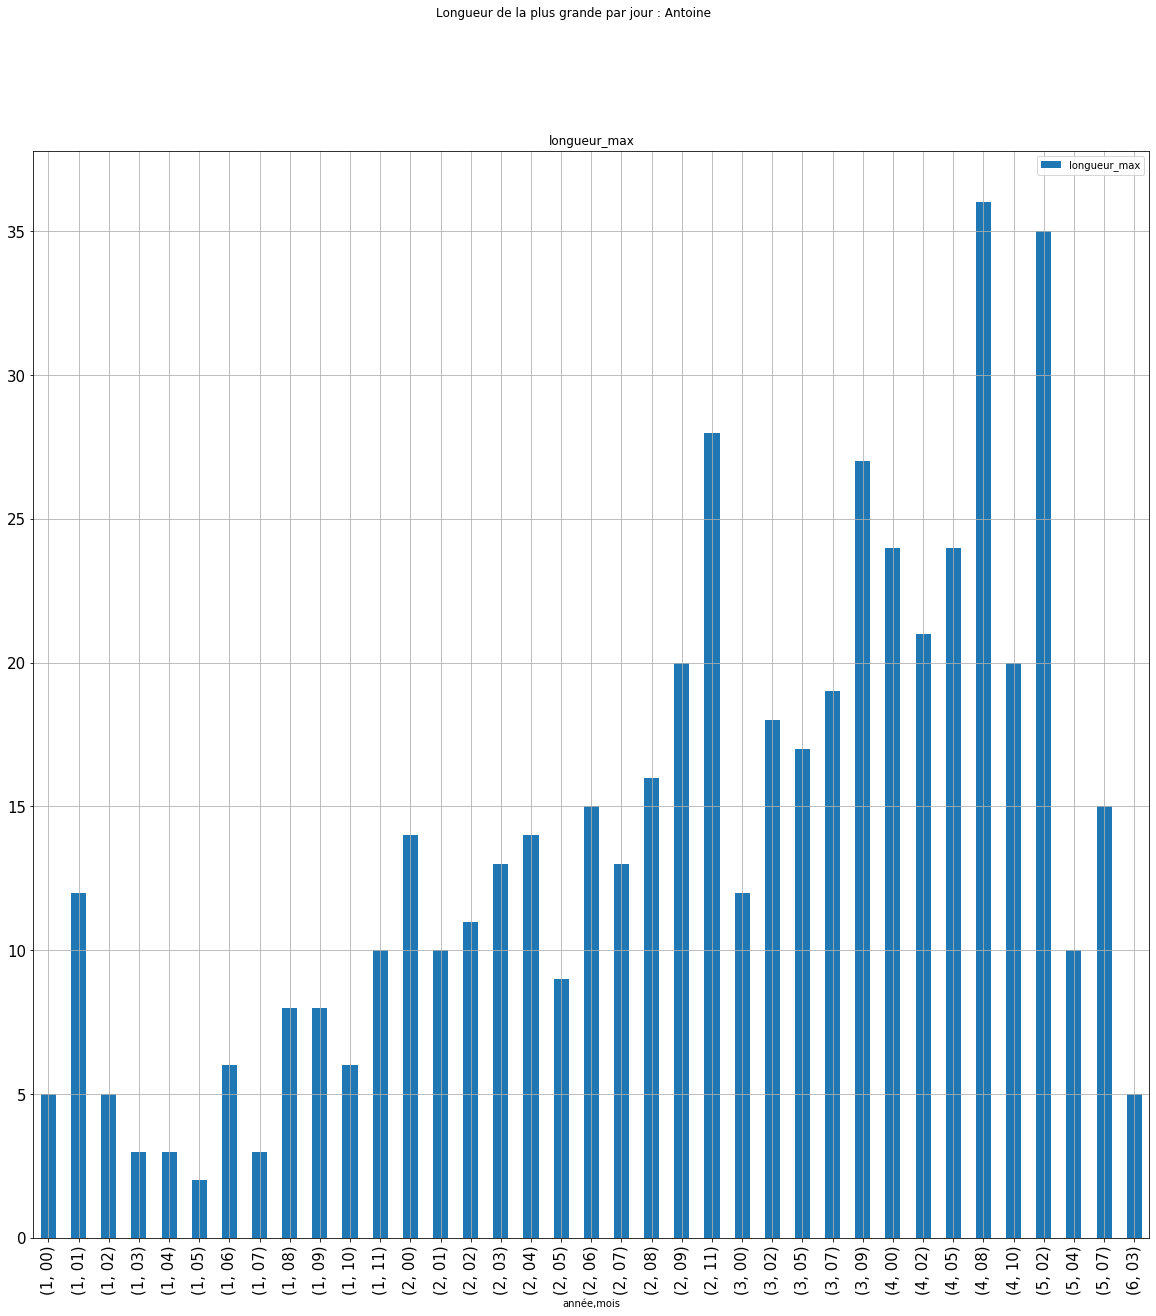

In [0]:
max_mot_pho_antoine.plot(kind='bar', 
                            subplots=True, 
                            figsize=(20, 20),
                            title = 'Longueur de la plus grande par jour : Antoine',
                            fontsize = 15,
                            use_index = True,
                            grid=True)

On voit qu'antoine a s'est exprimer à l'age 1_01_xx avec une phrase comportant un nombre de mot assez grand : 

In [0]:
pho_antoine.loc[pho_antoine['année'] == '1'].loc[pho_antoine.loc[pho_antoine['année'] == '1']['nombre_mot_phonétique'] == 12]
#pho_antoine
#pho_antoine_annee_1.loc[pho_antoine_annee_1['nombre_mot_phonétique'] == pho_antoine_annee_1['nombre_mot_phonétique'].max()]

,enfant,age,type,seconde_debut,seconde_fin,contenu,année,mois,jour,nombre_mot_phonétique
6963,ANTOINE,1_01_24,pho,NaN,NaN,puʁ diʁ mɛʁsi d tɑ̃ zɑ̃ tã i di i di si,1,01,24,12


### Gestion de l'encodage

In [0]:
import chardet

with open('data_antoine_final.csv', 'rb') as f:
    result = chardet.detect(f.read())  # or readline if the file is large

result

{'encoding': 'utf-8', 'confidence': 0.99, 'language': ''}

In [0]:
#data_antoine_final = pd.read_csv('data_antoine_final.csv', encoding=result['encoding'])
#data_antoine_final